In [1]:
# Import:
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
import os

sys.path.append("/home/mattg/D_CODE") # A questo punto è necessario per non doverlo chiamare i file che usano D_CODE.

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # include parent directory in the path
from toolbox.experiment import Experiment
from toolbox.SINDy import SINDy
from toolbox.symbolic_SINDy import symbolic_SINDy
from toolbox.cusum import CUSUM
from toolbox.auxiliary_functions import set_param_freq
from data import SINDy_data, equations

# Seed:
np.random.seed(999)

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


In [2]:
# Select ODE:
ode_name = 'TVSelkovODE'
ode_param = '0.92,0.62,0.1'
freq = 10
ode_param, freq = set_param_freq(ode_param, freq)
ode = equations.get_ode(ode_name, ode_param)

# Parameters:

freq_SR = 20
n_sample = 50 
noise_ratio = 0.01
seed = 100 
n_seed = 1 
dt = 1 / freq
dim_x = 3
dim_k = 0
SW_length = 15 # SINDy sliding window length
SW_length_SR = 10 # SR sliding window length
H = 70 # length of the experiment
lazy = False # if True, we do not recompute the building blocks with SR
symbolic = False # if True, SR call is allowed, otw. simple SINDy is used throughout the whole experiment

# CUSUM parameters:
N = 10 # 10
eps = 0.01 
threshold = 0.3 

In [ ]:
# Generate data: (6min 18.9sec)
X_list, dX_list, param_list, feature_names = SINDy_data.SINDy_data(ode_name, ode_param, freq, n_sample, noise_ratio, dim_x, dim_k, 0, H)
print(np.shape(X_list), np.shape(dX_list), np.shape(param_list))
print(feature_names)

# Save data:
file_path = 'saved/data/TVSelkovODE_data.pkl'
os.makedirs(os.path.dirname(file_path), exist_ok=True)
with open(file_path, 'wb') as f:
    dill.dump((X_list, dX_list, param_list, feature_names), f)

(50, 700, 3) (50, 700, 3) (0,)
['X0', 'X1', 'X2']


In [3]:
# Load data:
file_path = 'saved/data/TVSelkovODE_data.pkl'
with open(file_path, 'rb') as f:
    X_list, dX_list, param_list, feature_names = dill.load(f)

In [4]:
# Initialize experiment and model discovery methods:
exp = Experiment(ode, ode_param, freq_SR, n_sample, noise_ratio, seed, n_seed, dt, dim_x, dim_k, SW_length, SW_length_SR, H, lazy, symbolic)

cusum = CUSUM(N, eps, threshold)

SINDy_method = SINDy(degree=3, include_bias=True, threshold=0.08)

SR_method = 'SR-T' # symbolic regression method chosen 
x_id = 0  # equation to be identified by SR 
symbolic_SINDy_method = symbolic_SINDy(SR_method, x_id=0, degree=3)

In [5]:
# Run the experiment:

while exp.T <= exp.H:

    print(f't: {exp.T}')

    # update time-window:
    X_list_t = [x[(exp.T0*freq):(exp.T*freq)] for x in X_list]
    dX_list_t = [dx[(exp.T0*freq):(exp.T*freq)] for dx in dX_list]  

    exp.step_forward(SINDy_method, symbolic_SINDy_method, cusum, X_list_t, dX_list_t, param_list, feature_names)

    # building block search time: 3m 15s
    # total time: 6m 20s

t: 15
SINDy model:
(X0)' = 0.865 1 + -0.194 X0 X1 + -0.884 X0 X1^2
(X1)' = -1.138 X1 + 0.375 X0 X1 + 0.096 X1^2 + 0.777 X0 X1^2
(X2)' = 1.000 1
Model complexity:  8
Lasso penalty:  5.328921585722917
RMSE:  0.03399991356295819

t: 16
RMSE:  0.03697250371209763

t: 17
RMSE:  0.028803789615854114

t: 18
RMSE:  0.019179527665426268

t: 19
RMSE:  0.029097241180094557

t: 20
RMSE:  0.031461242553914255

t: 21
RMSE:  0.02583990103018711

t: 22
RMSE:  0.02589889205668932

t: 23
RMSE:  0.025618415460221505

t: 24
RMSE:  0.01759041306424446

t: 25
RMSE:  0.016669780199604155

t: 26
RMSE:  0.022161596252341216

t: 27
RMSE:  0.022308454644597176

t: 28
RMSE:  0.0207965487383711

t: 29
RMSE:  0.01941169500943496

t: 30
RMSE:  0.014844251030088993

t: 31
RMSE:  0.018024349457394038

t: 32
RMSE:  0.028636316173632114

t: 33
RMSE:  0.03367541720806621

t: 34
RMSE:  0.03352411481476787

t: 35
RMSE:  0.0319368318903203

t: 36
RMSE:  0.031492461109602805

t: 37
RMSE:  0.038304384836130474

t: 38
RMSE:  0

/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  

Too complex
RMSE:  1.9619652845658664

t: 49


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


SINDy model:
(X0)' = 0.755 1 + -0.788 X0 X1 + -0.318 X0 X1^2 + 0.253 X1^3
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  4
Lasso penalty:  2.1146741087771055
RMSE:  1.9847735702371776

t: 50
Too complex


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  1.9903608594566216

t: 51
SINDy model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  0
Lasso penalty:  0.0


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  1.9911461923803935

t: 52
Too complex


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  1.9764863861871003

t: 53
SINDy model:
(X0)' = 0.426 1 + -1.068 X0 X1^2 + 0.533 X1^3
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  3
Lasso penalty:  2.026677900037057


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  1.9502021803589398

t: 54
SINDy model:
(X0)' = 0.295 1 + 0.506 X1 + -0.236 X0 X1 + -0.802 X0 X1^2
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  4
Lasso penalty:  1.838555104273771


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  1.9567211856712272

t: 55
SINDy model:
(X0)' = 0.695 X1^2 + -0.968 X1^3
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  2
Lasso penalty:  1.663018707992482


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  1.988073416890287

t: 56
SINDy model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  0
Lasso penalty:  0.0


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  1.9670269505536027

t: 57
SINDy model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  0
Lasso penalty:  0.0


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  1.9754251373319582

t: 58
SINDy model:
(X0)' = 0.112 X0^2 X1 + -0.458 X1^3
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  2
Lasso penalty:  0.5693381078253908


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  2.142807773328714

t: 59
SINDy model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  0
Lasso penalty:  0.0


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  1.9941256949714998

t: 60
SINDy model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  0
Lasso penalty:  0.0


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  1.9866359741320203

t: 61
SINDy model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  0
Lasso penalty:  0.0


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  1.9800216341421304

t: 62
SINDy model:
(X0)' = 0.000
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  0
Lasso penalty:  0.0


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:191: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


RMSE:  1.9858692642064528

t: 63
SINDy model:
(X0)' = 0.259 X0^2 X1 + -0.509 X0 X1^2
(X1)' = 0.000
(X2)' = 0.000
Model complexity:  2
Lasso penalty:  0.768514372045784


/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(
/home/mattg/miniforge3/envs/SimbSINDy_env/lib/python3.11/site-packages/pysindy/optimizers/stlsq.py:201: UserWarning: Sparsity parameter is too big (0.08) and eliminated all coefficients
  warnings.warn(


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6265474055298D+02   r2 =  0.3375368309190D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6265474055298D+02   r2 =  0.3375368309190D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6265474055298D+02   r2 =  0.3375368309190D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.6265474055298D+02   r2 =  0.3375368309190D-14
 lsoda--  warning..internal t (=r1) 

capi_return is NULL
Call-back cb_f_in_lsoda__user__routines failed.


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
exp.plot()
exp.plot(x_id=1)
exp.plot_RMSE()

plotting
(450,)
(450,)
(600,)
(600,)
plotting
(450,)
(450,)
(600,)
(600,)


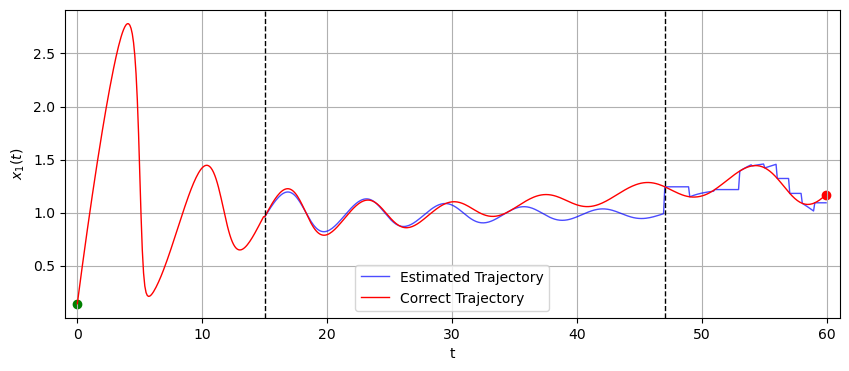

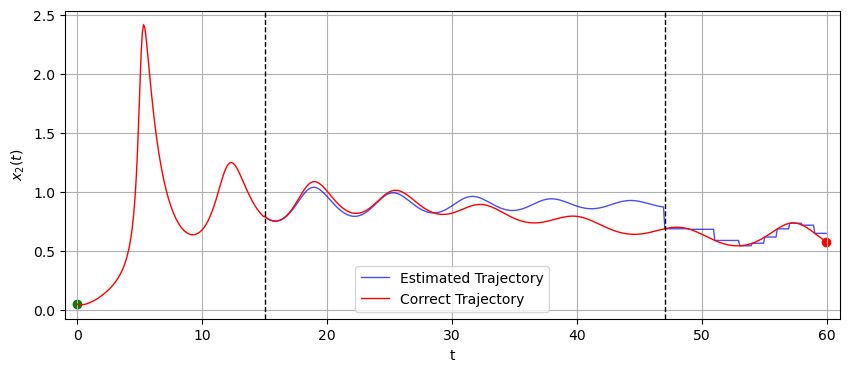

In [8]:
exp.plot()
exp.plot(x_id=1)